In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
config = {
    "base_dir":        "/eos/home-b/bpinolin/ML_output/",
    "plot_config":     "VBSOS",
    "cut":             "sr",
    "samples_version": "mjj_v7/top_WW/highZ",
    "cols": [
             'detajj',
             'ptll',
             'detall',        
             'jetpt1', 
             'jetpt2', 
             'met',
             'dphill',
             'dphijj',
             'Mll',
             'dR_jl1',
             'dR_jl2',
             'mjj',
             'Zepp1',
             'Zepp2',
             'qgl_forward',
             'qgl_central',
             'mtw1',
             'mtw2'
            ],
}

In [3]:
ye = "2016"

In [3]:
import os

config_base_dir = os.path.join(config["base_dir"], config["plot_config"])
# load numpy
samples_dir = os.path.join(config_base_dir, config["cut"] , "samples", config["samples_version"])
file_sig_bal = os.path.join(samples_dir, "for_training/signal_balanced.pkl")
file_bkg_bal = os.path.join(samples_dir, "for_training/background_balanced.pkl")

In [4]:
import os

config_base_dir = os.path.join(config["base_dir"], config["plot_config"])
# load numpy
samples_dir = os.path.join(config_base_dir, config["cut"] , "samples", config["samples_version"])
file_sig_bal = os.path.join(samples_dir, "for_training_"+ye+"/signal_balanced.pkl")
file_bkg_bal = os.path.join(samples_dir, "for_training_"+ye+"/background_balanced.pkl")

In [4]:
import pickle
signal = pickle.load(open(file_sig_bal, "rb"))
bkg = pickle.load(open(file_bkg_bal, "rb"))

In [5]:
bkg = bkg.dropna()
signal = signal.dropna()

## Comparing train and test

## Plotting weights

fig = plt.figure(figsize=(6,5), dpi=100)
_ = plt.hist(bkg["puWeight"], bins=100, histtype="step", density=True, label="top", color='blue')
plt.title("puWeight Background with 0-weight events")
plt.show()

## Check weights Wnn

## Plotting all variables

## Extracting mjj for ROC

#v6 

sig_tot = 51435
bkg_tot = 1733357

eS = round(len(signal)/sig_tot,3)
eB = round(len(bkg)/bkg_tot,3)

print("Queste percentuali vengono utilizzate per la ROC di mjj")
print("% signal = ", eS)
print("% bkg = ", eB)



In [6]:
#v7 top+WW
low_sig = 225
low_bkg = 7155

low_sig_2016 = 46
low_bkg_2016 = 1929
low_sig_2017 = 67
low_bkg_2017 = 2058
low_sig_2018 = 113
low_bkg_2018 = 3168

high_sig = 93
high_bkg = 6063

high_sig_2016 = 18
high_bkg_2016 = 1582
high_sig_2017 = 28
high_bkg_2017 = 1808
high_sig_2018 = 47
high_bkg_2018 = 2672

In [7]:
eS = round(signal.weight_.sum()/high_sig,3)
eB = round(bkg.weight_.sum()/high_bkg,3)

print("Queste percentuali vengono utilizzate per la ROC di mjj")
print("% signal = ", eS)
print("% bkg = ", eB)

Queste percentuali vengono utilizzate per la ROC di mjj
% signal =  0.457
% bkg =  0.132


In [8]:
bins = 26

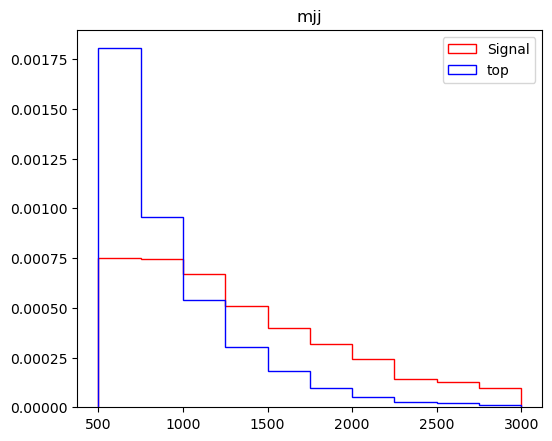

In [9]:
fig = plt.figure(figsize=(6,5), dpi=100)
_ = plt.hist(signal["mjj"], bins=10, histtype="step", label="Signal", color='red', density = True, range=(500,3000))
_ = plt.hist(bkg["mjj"], bins=10, histtype="step", label="top", color='blue', density = True, range=(500,3000))
plt.legend()
plt.title("mjj")
plt.show()

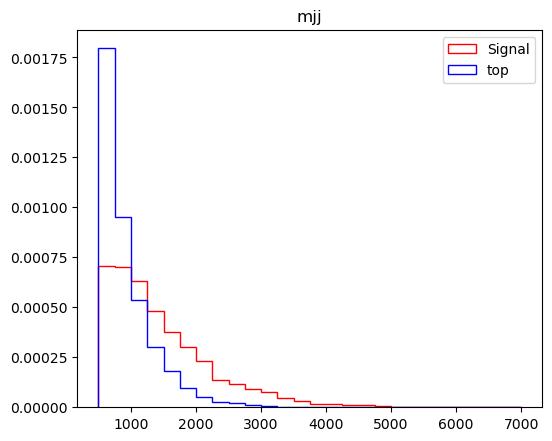

In [10]:
fig = plt.figure(figsize=(6,5), dpi=100)
_ = plt.hist(signal["mjj"], bins=bins, histtype="step", label="Signal", color='red', density = True, range=(500,7000))
_ = plt.hist(bkg["mjj"], bins=bins, histtype="step", label="top", color='blue', density = True, range=(500,7000))
plt.legend()
plt.title("mjj")
plt.show()

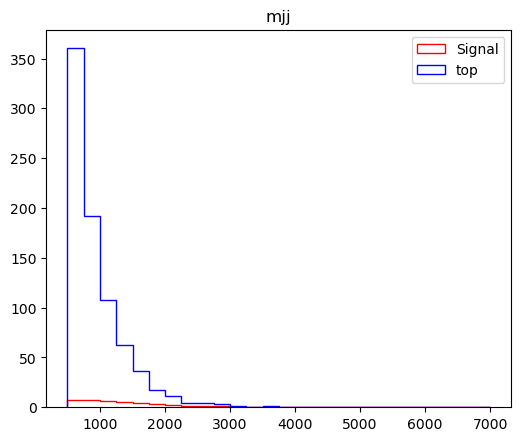

In [11]:
fig = plt.figure(figsize=(6,5), dpi=100)
n_sig, b, _ = plt.hist(signal["mjj"], bins=bins, histtype="step", weights=signal["weight_"], label="Signal", color='red', range=(500,7000))
n_bkg, b, _ = plt.hist(bkg["mjj"], bins=bins, histtype="step", weights=bkg["weight_"], label="top", color='blue', range=(500,7000))
plt.legend()
plt.title("mjj")
plt.show()

In [12]:
s_n = 0 
for i in range (10,26):
    s_n = n_sig[i]+s_n
n_sig[9] = n_sig[9]+s_n
n_sig = n_sig[0:10]

In [13]:
b_n = 0 
for i in range (10,26):
    b_n = n_bkg[i]+b_n
n_bkg[9] = n_bkg[9]+b_n
n_bkg = n_bkg[0:10]

In [14]:
effS = np.array([])
effB = np.array([])

for i in range(len(n_sig)):
    i = i+1
    S = sum(n_sig[-i:len(n_sig)])
    effS = np.append(effS, S/sum(n_sig))
    
for j in range(len(n_bkg)):
    j = j+1
    B = sum(n_bkg[-j:len(n_bkg)])
    effB = np.append(effB, B/sum(n_bkg))

In [15]:
# Considero efficienza di segnale e fondo delle selezioni
import numpy as np

new_effS = np.array([])
new_effB = np.array([])

for i in range (len(effS)):
    add = effS[i]*eS
    new_effS = np.append(new_effS, add)

for i in range (len(effB)):
    add = effB[i]*eB
    new_effB = np.append(new_effB, add)

In [16]:
print(new_effS.tolist())
print(new_effB.tolist())

[0.03274675401795451, 0.04579009469137433, 0.060691717619052364, 0.08574379624620018, 0.11792795982274189, 0.16281693518854093, 0.2174847237431197, 0.2904653130901291, 0.3735721687370016, 0.457]
[0.0009925740353164964, 0.0017172803535763096, 0.002477678712917264, 0.004276909217668707, 0.0070732285266382165, 0.013025013322205431, 0.023270224022429217, 0.04106772927008085, 0.07259531167378055, 0.132]


In [ ]:
#highZ
effS = [0.03274675401795451, 0.04579009469137433, 0.060691717619052364, 0.08574379624620018, 0.11792795982274189, 0.16281693518854093, 0.2174847237431197, 0.2904653130901291, 0.3735721687370016, 0.457]
effB = [0.0009925740353164964, 0.0017172803535763096, 0.002477678712917264, 0.004276909217668707, 0.0070732285266382165, 0.013025013322205431, 0.023270224022429217, 0.04106772927008085, 0.07259531167378055, 0.132]

In [18]:
#highZ_2016
effS = [0, 0.032859863193266045, 0.04286628643785392, 0.06183378242333377, 0.08423601242531985, 0.11256064018827054, 0.16380496316052204, 0.21657141750070386, 0.29340808761340625, 0.38950317690497666, 0.48]
effB = [0, 0.000784820168664633, 0.0012456374794882102, 0.002019612404377466, 0.003505499169725784, 0.006719901743424429, 0.012342969476738809, 0.02094215023190083, 0.038186117121141026, 0.06983142044628016, 0.129]

In [19]:
#highZ_2017
effS = [0, 0.03286398275917417, 0.04414247725593568, 0.060771255497782534, 0.0847434209050629, 0.11915426597152175, 0.1611660375471056, 0.2172102978016691, 0.290827342202177, 0.3708533047199497, 0.454]
effB = [0, 0.00048239761808740734, 0.0008987800399028315, 0.0012395642234539577, 0.003053956225005616, 0.005042716030287665, 0.010100188620003924, 0.021070918384195687, 0.038802521413860036, 0.06913835457339781, 0.128]

In [20]:
#highZ_2018
effS = [0, 0.03263590575888197, 0.047896751828632865, 0.06021073478427961, 0.08692454841811627, 0.11926432208068198, 0.16343378055700156, 0.21801447384658038, 0.2891421547089592, 0.3691097290410236, 0.45]
effB = [0, 0.001464239367810787, 0.002556226380077726, 0.0035953560312516125, 0.005576602022516514, 0.008683031925474852, 0.015457341541901183, 0.026225102836757008, 0.0444647008744982, 0.07685340728400411, 0.137]

In [ ]:
#lowZ
effS = [0, 0.038147378015657984, 0.05226899893553604, 0.07215642173078458, 0.09875286464228226, 0.1324912742801603, 0.17652495522274605, 0.230783690172941, 0.2994223643117844, 0.37695885734872425, 0.449]
effB = [0, 0.0011036888392771177, 0.001541141084215027, 0.0025487556157871537, 0.003808014426368222, 0.0058008862429716765, 0.009734410403132, 0.016711756129271046, 0.02987611787371045, 0.05437221466142098, 0.105]

In [21]:
#lowZ_2016
effS = [0.03639246458270623, 0.05091639883591931, 0.0709998470097688, 0.09103572639835818, 0.12987936731326005, 0.17703121389348847, 0.23000000215784408, 0.3013737153673264, 0.3830027549675318, 0.461]
effB = [0.0009231282743284733, 0.001434669496035952, 0.002215992020838878, 0.0031727356133491686, 0.0049252072699602755, 0.008139009605170156, 0.01451781504654356, 0.024750108997785784, 0.046081561389563964, 0.094]

SyntaxError: invalid syntax (<ipython-input-21-c41ee5592067>, line 2)

In [ ]:
#lowZ_2017
effS = [0, 0.03236413788747314, 0.04339737371878153, 0.06130189870478078, 0.08699384865456022, 0.11814871300488188, 0.15980220292257316, 0.2149082411979369, 0.2810246581453769, 0.36098916215557453, 0.432]
effB = [0, 0.001363839219991582, 0.0014822591500285639, 0.0026548216083982705, 0.003989288520095259, 0.005823320939408343, 0.01042249956256694, 0.016445106286529048, 0.031804909761499696, 0.05802078878035203, 0.111]

In [ ]:
#lowZ_2018
effS = [0, 0.042020162067011674, 0.05770846847655501, 0.07855033146195436, 0.10816762906027519, 0.14111767153856145, 0.18497907449035433, 0.2388759043903969, 0.30740794350705763, 0.3812867431318826, 0.451]
effB = [0, 0.0010363431808348021, 0.0016324090297795137, 0.0026627694680002563, 0.004047228697847985, 0.006273916930618054, 0.01018302445647368, 0.018090019273715972, 0.03151058180675164, 0.056628343925008345, 0.107]